# **AI-Powered Webinar-to-LinkedIn Pipeline** ⚡

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/video-db/videodb-cookbook/blob/main/meeting_agent/Webinar_To_Linkedin.ipynb)

Meet Varun — a content maestro at a leading tech company and a sharp voice in the industry. His day is a blur of attending webinars, creating high-impact LinkedIn posts, and keeping his brand top-of-mind in an ever-buzzing tech world.  

But with endless strategy calls and surprise tasks flying in, Varun barely has time to watch every webinar, let alone transform them into punchy posts.  

That’s where VideoDB steps in as his behind-the-scenes superpower. 🦸‍♂️⚡

With VideoDB, Varun can:
- Let an AI assistant attend and record webinars for him
- Instantly generate transcripts
- Craft engaging, ready-to-publish LinkedIn updates
- Even post them automatically for maximum reach — no manual hassle

Let’s see how to build this smart assistant and help Varun (or you!) focus on what truly matters.


### Install dependencies and connect to VideoDB

In [ ]:
!pip -q install videodb

  Preparing metadata (setup.py) ... done


In [ ]:
import os
from getpass import getpass

videodb_api_key = getpass("Please enter your VideoDB API Key: ")

os.environ["VIDEO_DB_API_KEY"] = videodb_api_key

from videodb import connect
conn = connect()

Please enter your VideoDB API Key: ··········


### Connect to the default collection

In [ ]:
coll = conn.get_collection()
print(coll)

#### We can also create a new meeting collection

In [ ]:
# coll = conn.create_collection(name ="Meeting Recorder", description = "This collection stores videos related to Meeting Recording Agent.")
# print(coll)

### 🎥 **Record & Transcribe: Let AI Do the Watching**

Imagine skipping the note-taking chaos while your AI buddy silently records and transcribes the entire webinar.

VideoDB breaks down every spoken word into a neat, searchable transcript.  
This means Varun can later search exact phrases, highlight golden sound bites, and never miss a juicy detail again.

From hours of raw video to an actionable text — magic at work. 🧙✨


### Recording Webinar and transcribing it

In [ ]:
meeting = coll.record_meeting(
    meeting_url="https://meet.google.com/vai-pfyz-fjt",
    bot_name="VideoDB Webinar Bot",
    meeting_title="Stanford Webinar",
    callback_url="https://a1b2c3d4e5f6g7h8i9j0k1l2m3n4o5p8.m.pipedream.net",
)

### For the usecase demo, we have used a youtube video using the following snippet.

In [ ]:
# webinar = coll.upload(url="https://www.youtube.com/watch?v=XNqpySV97IU&t=1681s")

### Connecting to the webinar video if already recorded

In [ ]:
# webinar = coll.get_video(video_id=meeting.video_id)
# print(webinar)

### Transcribing the webinar

In [ ]:
webinar.index_spoken_words()
webinar_content = webinar.get_transcript_text()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:02<00:00,  1.60it/s]


### ✨ **Generate a Killer LinkedIn Post**

The real star move? Turn that transcript into a captivating, discussion-ready LinkedIn post.

VideoDB’s integrated LLM crafts:
- Sharp takeaways that spark curiosity
- Friendly, engaging language
- Emojis to boost readability and appeal
- Hashtags to amplify reach

Varun no longer has to spend hours agonizing over phrasing — his AI friend delivers a polished draft in seconds. 🚀


In [ ]:
def generate_linkedin_post(webinar_transcript: str) -> str | None:
    if not webinar_transcript:
        return None

    linkedin_post_prompt = f"""
Based on the following webinar transcript, craft a compelling and engaging LinkedIn text post.
The post should:
- Highlight key takeaways or exciting insights from the webinar.
- Be concise and easy to read.
- Encourage discussion or further engagement.
- Include relevant emojis to enhance readability and appeal.
- Incorporate appropriate hashtags.
- Be a single, clear string of text, ready for direct posting. Do NOT include any JSON formatting, introductory phrases, or conversational elements outside the post itself.

---
Webinar Transcript:
{webinar_transcript}
---
"""

    try:
        response_text = coll.generate_text(
            prompt=linkedin_post_prompt,
            model_name="pro",
        )
        return(response_text)

    except Exception:
        return None

In [ ]:
post_content = generate_linkedin_post(webinar_content)
print(post_content)

{'output': 'Just attended a mind-blowing webinar on AI strategy with Microsoft\'s Aditya Chalapalli and my perspective is completely shifted! 🤯\n\nIf you think the big money in GenAI is with the model creators, think again.\n\nHere are some of the most powerful takeaways:\n\n👑 **Distribution is the new king.** The biggest competitive advantage isn\'t having the best model or the most data—it\'s having access to users. This means non-tech companies (finance, legal, healthcare) are uniquely positioned to win!\n\n💡 **Focus on consumption, not creation.** Users get far more value from AI that helps them consume and understand information (e.g., summarizing reviews, analyzing reports) than from tools that just create new content from scratch.\n\n🚫 **Stop building chatbots!** Research shows users find them unhelpful. The real win is integrating AI features natively into your existing products and workflows.\n\n🗣️ **Pro Tip for Business Pros:** Want to earn instant credibility with your tech 

In [ ]:
import json
post_string = post_content.get("output",post_content)
print(post_string)

Just attended a mind-blowing webinar on AI strategy with Microsoft's Aditya Chalapalli and my perspective is completely shifted! 🤯

If you think the big money in GenAI is with the model creators, think again.

Here are some of the most powerful takeaways:

👑 **Distribution is the new king.** The biggest competitive advantage isn't having the best model or the most data—it's having access to users. This means non-tech companies (finance, legal, healthcare) are uniquely positioned to win!

💡 **Focus on consumption, not creation.** Users get far more value from AI that helps them consume and understand information (e.g., summarizing reviews, analyzing reports) than from tools that just create new content from scratch.

🚫 **Stop building chatbots!** Research shows users find them unhelpful. The real win is integrating AI features natively into your existing products and workflows.

🗣️ **Pro Tip for Business Pros:** Want to earn instant credibility with your tech teams? Stop saying "GenAI" 

### 🚀 **Auto-Post Directly to LinkedIn**

No more jumping between tools. Once your post is ready, Composio swoops in to publish it directly on LinkedIn — like a stealthy AI ninja. 🥷✨

Whether it’s Varun’s personal profile or the company page, posts go live in a single click.  
All while Varun focuses on strategy, community, or maybe just enjoys a peaceful tea break. ☕🤓

#### 🛠️ **Abstract Steps to Connect**

1️⃣ Sign up to Composio.  
2️⃣ Create a LinkedIn integration.  
3️⃣ Come back with your API key.  

---

And boom — your AI-powered sidekick is now ready to turn webinars into viral thought-leadership posts without lifting a finger. 💥✍️


In [ ]:
!pip -q install composio

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 501.2/501.2 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 51.5 MB/s eta 0:00:00


In [ ]:
import os
from getpass import getpass

composio_api_key = getpass("Please enter your Composio API Key: ")

Please enter your Composio API Key: ··········


In [ ]:
LINKEDIN_USER_URN = input("Please enter your LinkedIn User URN (e.g., 'urn:li:person:g8zouwXBBF'): ")

Please enter your LinkedIn User URN (e.g., 'urn:li:person:g8zouwXBBF'): urn:li:person:g8zouwXBBF


In [ ]:
import json
from composio import ComposioToolSet, Action, App
import os

toolset = ComposioToolSet(api_key=composio_api_key)

print("--- Sending Post to LinkedIn via Composio ---")

try:

    linkedin_post_action = Action.LINKEDIN_CREATE_LINKED_IN_POST

    post_params = {
        "author": LINKEDIN_USER_URN,
        "commentary": post_string,
    }

    response = toolset.execute_action(
        action=linkedin_post_action,
        params=post_params,
    )

    if response and response.get('successful'):
        print(f"✅ Successfully sent LinkedIn post via Composio!")
        print("   Composio Response Data:", json.dumps(response.get('data'), indent=2))
    else:
        print(f"❌ Failed to send LinkedIn post. Error: {response.get('error', 'Unknown error')}")
        print("   Composio Response (full):", json.dumps(response, indent=2))

except Exception as e:
    print(f"❌ An error occurred during Composio execution: {e}")

### The post was made successfully on Linkedin.

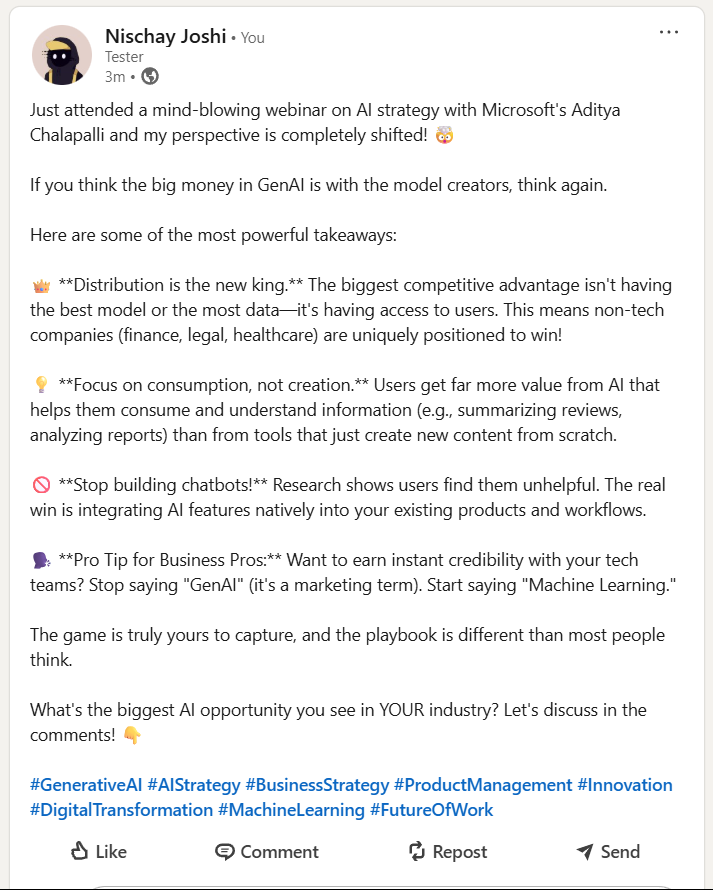

### 💡 **Beyond Blog Posts: Endless Possibilities**

Why stop at LinkedIn posts?

With the same setup, you can:
- Clip out spicy video snippets for reels 🎬
- Create highlight reels or short TikTok-style insights ⚡
- Generate email newsletters or internal recaps 📬
- Craft website blog drafts without lifting a finger

VideoDB isn’t just an assistant — it’s a full-on creative partner ready to supercharge your content game.  
The only limit? Your imagination. 🌌✨

What will you build next?
